In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
data = pd.read_excel("大乐透.xlsx")

In [3]:
data.head()

,期数,日期,前区1,前区2,前区3,前区4,前区5,后区1,后区2
0,21013,2021-01-30,21,27,28,30,34,8,11
1,21012,2021-01-27,6,12,20,23,33,1,9
2,21011,2021-01-25,6,9,11,14,21,1,3
3,21010,2021-01-23,1,5,16,22,34,8,11
4,21009,2021-01-20,1,3,20,29,32,5,12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   期数      2079 non-null   int64 
 1   日期      2079 non-null   object
 2   前区1     2079 non-null   int64 
 3   前区2     2079 non-null   int64 
 4   前区3     2079 non-null   int64 
 5   前区4     2079 non-null   int64 
 6   前区5     2079 non-null   int64 
 7   后区1     2079 non-null   int64 
 8   后区2     2079 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 146.3+ KB


In [5]:
data.describe()

,期数,前区1,前区2,前区3,前区4,前区5,后区1,后区2
count,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000
mean,13740.907648,6.261664,12.556518,18.989899,24.827321,30.508899,4.377585,8.748918
std,3932.002131,5.053689,6.330834,6.586538,6.089049,4.481036,2.690714,2.671899
min,7001.000000,1.000000,2.000000,3.000000,4.000000,10.000000,1.000000,2.000000
25%,10120.500000,2.000000,8.000000,14.000000,21.000000,28.000000,2.000000,7.000000
50%,14026.000000,5.000000,12.000000,19.000000,26.000000,32.000000,4.000000,9.000000
75%,17084.500000,9.000000,17.000000,24.000000,30.000000,34.000000,6.000000,11.000000
max,21013.000000,30.000000,32.000000,33.000000,34.000000,35.000000,11.000000,12.000000


In [11]:
data_before = data.iloc[0:data.shape[0],2:7]

In [12]:
data_before.head()

,前区1,前区2,前区3,前区4,前区5
0,21,27,28,30,34
1,6,12,20,23,33
2,6,9,11,14,21
3,1,5,16,22,34
4,1,3,20,29,32


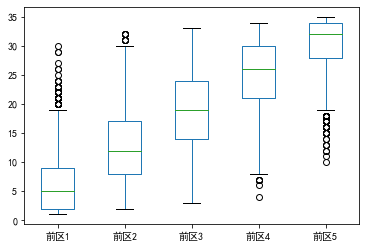

In [13]:
data_before.plot(kind='box')

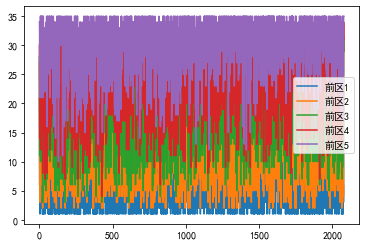

In [14]:
data_before.plot(kind='line');

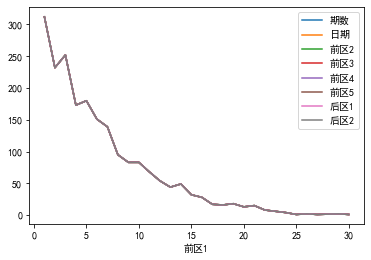

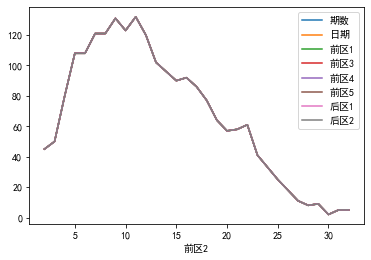

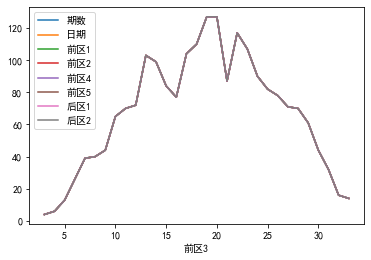

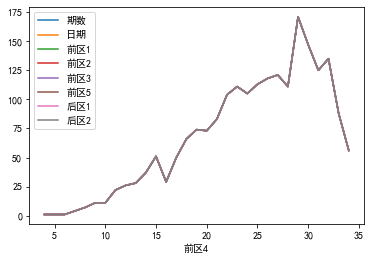

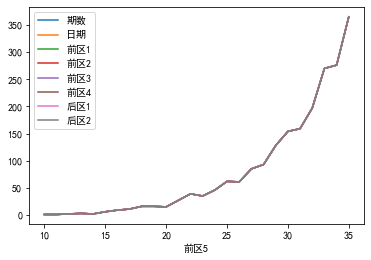

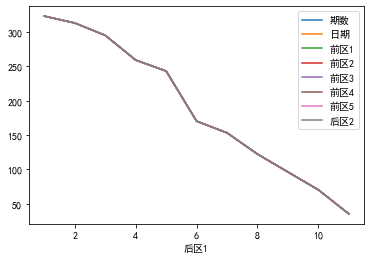

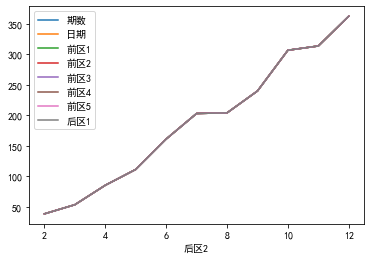

In [15]:
for i in range(0,7):
    data.groupby(data.columns[i+2]).count().plot()

In [16]:
data_count = pd.DataFrame()
for i in range(0,7):
    data_count = pd.concat([data_count,data.iloc[:,[0,i+2]].groupby(data.columns[i+2]).count()],axis=1)

In [17]:
data_count.columns = data.columns[2:]

In [18]:
data_count.head()

,前区1,前区2,前区3,前区4,前区5,后区1,后区2
1,312.0,NaN,NaN,NaN,NaN,323.0,NaN
2,232.0,45.0,NaN,NaN,NaN,313.0,38.0
3,252.0,50.0,4.0,NaN,NaN,295.0,53.0
4,173.0,80.0,6.0,1.0,NaN,259.0,85.0
5,180.0,108.0,13.0,NaN,NaN,243.0,111.0


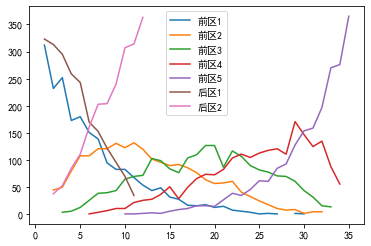

In [19]:
data_count.plot();

In [20]:
data_count['before_sum'] = data_count.iloc[:,0:5].sum(axis=1)
data_count['after_sum'] = data_count.iloc[:,5:7].sum(axis=1)

In [21]:
data_count.head()

,前区1,前区2,前区3,前区4,前区5,后区1,后区2,before_sum,after_sum
1,312.0,NaN,NaN,NaN,NaN,323.0,NaN,312.0,323.0
2,232.0,45.0,NaN,NaN,NaN,313.0,38.0,277.0,351.0
3,252.0,50.0,4.0,NaN,NaN,295.0,53.0,306.0,348.0
4,173.0,80.0,6.0,1.0,NaN,259.0,85.0,260.0,344.0
5,180.0,108.0,13.0,NaN,NaN,243.0,111.0,301.0,354.0


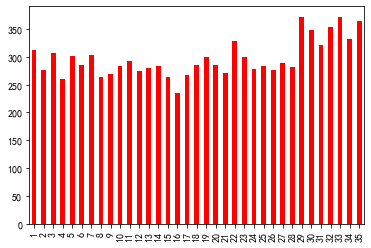

In [22]:
data_count['before_sum'].plot(kind='bar',color="red");

In [23]:
data_count.sort_values(by='before_sum')

,前区1,前区2,前区3,前区4,前区5,后区1,后区2,before_sum,after_sum
16,28.0,92.0,77.0,29.0,9.0,NaN,NaN,235.0,0.0
4,173.0,80.0,6.0,1.0,NaN,259.0,85.0,260.0,344.0
8,95.0,121.0,40.0,7.0,NaN,122.0,204.0,263.0,326.0
15,32.0,90.0,84.0,51.0,6.0,NaN,NaN,263.0,0.0
17,17.0,86.0,104.0,50.0,11.0,NaN,NaN,268.0,0.0
9,83.0,131.0,44.0,11.0,NaN,96.0,240.0,269.0,336.0
21,15.0,58.0,87.0,83.0,27.0,NaN,NaN,270.0,0.0
12,54.0,120.0,72.0,26.0,2.0,NaN,363.0,274.0,363.0
26,2.0,18.0,78.0,118.0,61.0,NaN,NaN,277.0,0.0
2,232.0,45.0,NaN,NaN,NaN,313.0,38.0,277.0,351.0


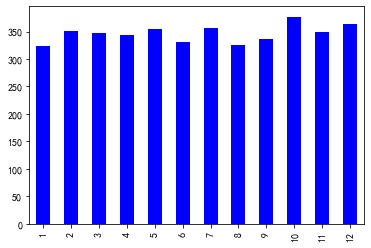

In [24]:
data_count['after_sum'][:12].plot(kind='bar',color="blue");

In [25]:
data_count.sort_values(by='after_sum',ascending=False)

,前区1,前区2,前区3,前区4,前区5,后区1,后区2,before_sum,after_sum
10,83.0,123.0,65.0,11.0,1.0,70.0,307.0,283.0,377.0
12,54.0,120.0,72.0,26.0,2.0,NaN,363.0,274.0,363.0
7,139.0,121.0,39.0,4.0,NaN,153.0,203.0,303.0,356.0
5,180.0,108.0,13.0,NaN,NaN,243.0,111.0,301.0,354.0
2,232.0,45.0,NaN,NaN,NaN,313.0,38.0,277.0,351.0
11,68.0,132.0,70.0,22.0,1.0,35.0,314.0,293.0,349.0
3,252.0,50.0,4.0,NaN,NaN,295.0,53.0,306.0,348.0
4,173.0,80.0,6.0,1.0,NaN,259.0,85.0,260.0,344.0
9,83.0,131.0,44.0,11.0,NaN,96.0,240.0,269.0,336.0
6,151.0,108.0,26.0,1.0,NaN,170.0,161.0,286.0,331.0
